**1. Data Loading, Preparation, and Exploratory Data Analysis**

**1.1 Import Necessary Libraries**

In [1]:
# Standard Library Imports
import os
import zipfile

# Third-Party Imports for Data Handling
import numpy as np
import pandas as pd
from google.colab import drive

# Third-Party Imports for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Third-Party Imports for Machine Learning Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set visualization style
sns.set(style="whitegrid")

**1.2 Mount Google Drive**

In [2]:
# Mounts Google Drive to the Colab environment to access files.

drive.mount('/content/drive')

print("\n✅ Google Drive is successfully mounted!")

Mounted at /content/drive

✅ Google Drive is successfully mounted!


**1.3 Define, Unzip, and Load the Dataset**

In [3]:
# Description: Defines paths, extracts the zipped dataset, and loads all CSVs into a single DataFrame.

# Define paths and create directory
zip_path = '/content/drive/MyDrive/Research/Dataset/MachineLearningCSV.zip'
extract_path = '/content/extracted_csvs/'
os.makedirs(extract_path, exist_ok=True)

# Unzip the dataset
print(f"--- Unzipping Dataset ---")
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    # Dynamically find the name of the extracted folder
    extracted_items = os.listdir(extract_path)
    if not extracted_items:
        raise Exception("Extraction failed: The extraction directory is empty.")

    data_folder_name = extracted_items[0]
    data_folder_path = os.path.join(extract_path, data_folder_name)
    print(f"✅ Extraction complete. Data is in: '{data_folder_path}'")

    # Load and concatenate all CSV files
    print("\n--- Loading All Raw CSV Files ---")

    # Find all files in the directory that end with .csv
    csv_files = [f for f in os.listdir(data_folder_path) if f.endswith('.csv')]

    if not csv_files:
        raise Exception("No CSV files found in the extracted directory.")

    # Create a list to hold each loaded DataFrame
    df_list = []
    for file in sorted(csv_files): # sorted() ensures a consistent order
        print(f"-> Reading {file}...")
        file_path = os.path.join(data_folder_path, file)
        try:
            # on_bad_lines can help skip problematic rows
            df_temp = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')
            df_list.append(df_temp)
        except Exception as e:
            print(f"  [WARNING] Could not read {file}: {e}")

    # Combine all DataFrames in the list into one
    if df_list:
        df = pd.concat(df_list, ignore_index=True)
        print(f"\n✅ All {len(df_list)} CSV files loaded and combined successfully.")
    else:
        print("\n❌ No data was loaded.")

except FileNotFoundError:
    print(f"\n❌ ERROR: Zip file not found at the specified path: {zip_path}")
except Exception as e:
    print(f"\n❌ An unexpected error occurred: {e}")

--- Unzipping Dataset ---
✅ Extraction complete. Data is in: '/content/extracted_csvs/MachineLearningCVE'

--- Loading All Raw CSV Files ---
-> Reading Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv...
-> Reading Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv...
-> Reading Friday-WorkingHours-Morning.pcap_ISCX.csv...
-> Reading Monday-WorkingHours.pcap_ISCX.csv...
-> Reading Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv...
-> Reading Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv...
-> Reading Tuesday-WorkingHours.pcap_ISCX.csv...
-> Reading Wednesday-workingHours.pcap_ISCX.csv...

✅ All 8 CSV files loaded and combined successfully.


**1.4 Initial Data Inspection**

In [4]:
# check if the dataframe exists before proceeding
if 'df' in locals():
    print("--- Starting Initial Data Inspection ---")

    # inspect basic information: shape and a sample of rows
    print(f"\n[INFO] Dataset Shape: {df.shape}")
    print("\n[INFO] First 5 Rows of the Dataset:")
    display(df.head())

    # check data types and look for non-null counts
    print("\n[INFO] Data Types and Non-Null Counts:")
    # using verbose=True ensures all columns are displayed
    df.info(verbose=True)

    # identify columns with problematic leading/trailing whitespace
    problematic_columns = [col for col in df.columns if col != col.strip()]
    if problematic_columns:
        print(f"\n[WARNING] Found {len(problematic_columns)} columns with leading/trailing whitespace in their names.")
        # print(f"Columns: {problematic_columns}")

    # check for the presence of infinite values, which can cause errors
    inf_counts = df.isin([np.inf, -np.inf]).sum()
    if inf_counts.sum() > 0:
        print("\n[WARNING] Found infinite values in the following columns:")
        print(inf_counts[inf_counts > 0])
    else:
        print("\n[INFO] No infinite values found in the dataset.")

    # inspect the raw distribution of the target variable, 'Label'
    # note the leading space in ' Label', which is common in this dataset
    if ' Label' in df.columns:
        print("\n[INFO] Raw Distribution of the 'Label' Column:")
        print(df[' Label'].value_counts())
    else:
        print("\n[WARNING] ' Label' column not found. Please check column names.")

else:
    print("❌ DataFrame 'df' not found. Please ensure the data loading cell (1.3) was executed successfully.")

--- Starting Initial Data Inspection ---

[INFO] Dataset Shape: (2830743, 79)

[INFO] First 5 Rows of the Dataset:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN



[INFO] Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std            

**1.5 Initial Data Cleaning**

In [5]:
# check that the raw dataframe exists before proceeding
if 'df' in locals():
    print("--- Starting Initial Data Cleaning ---")

    # create a copy to preserve the original raw dataframe
    df_clean = df.copy()

    # fix column names by stripping leading/trailing whitespace
    df_clean.columns = df_clean.columns.str.strip()
    print("[INFO] Cleaned whitespace from all column names.")

    # replace infinite values with NaN (Not a Number)
    df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
    print(f"[INFO] Replaced infinite values with NaN.")

    # drop all rows that now contain any NaN values
    rows_before_drop = len(df_clean)
    df_clean.dropna(inplace=True)
    rows_after_drop = len(df_clean)
    print(f"[INFO] Dropped {rows_before_drop - rows_after_drop} rows containing missing values.")

    # fix the character encoding issue found in the 'Label' column
    df_clean['Label'] = df_clean['Label'].str.replace('ï¿½', '', regex=False)
    print("[INFO] Corrected character encoding errors in 'Label' column.")

    print("\n✅ Initial data cleaning complete.")
    print(f"Dataset shape after cleaning: {df_clean.shape}")

else:
    print("❌ DataFrame 'df' not found. Please ensure cell 1.3 was executed successfully.")

--- Starting Initial Data Cleaning ---
[INFO] Cleaned whitespace from all column names.
[INFO] Replaced infinite values with NaN.
[INFO] Dropped 2867 rows containing missing values.
[INFO] Corrected character encoding errors in 'Label' column.

✅ Initial data cleaning complete.
Dataset shape after cleaning: (2827876, 79)


**1.6 Exploratory Data Analysis (EDA)**

**1.6.1 Univariate Analysis**

--- Starting Exploratory Data Analysis ---


/tmp/ipython-input-2235358795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Label', data=df_clean, order=df_clean['Label'].value_counts().index, palette='Blues_r')


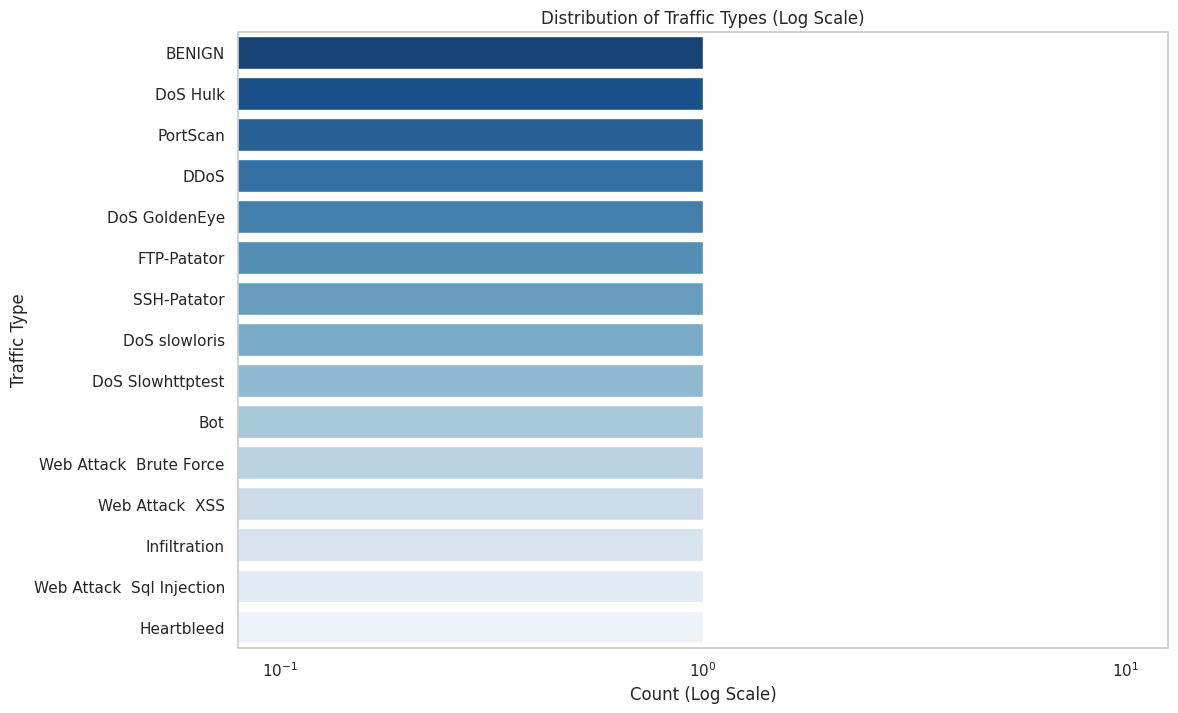

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


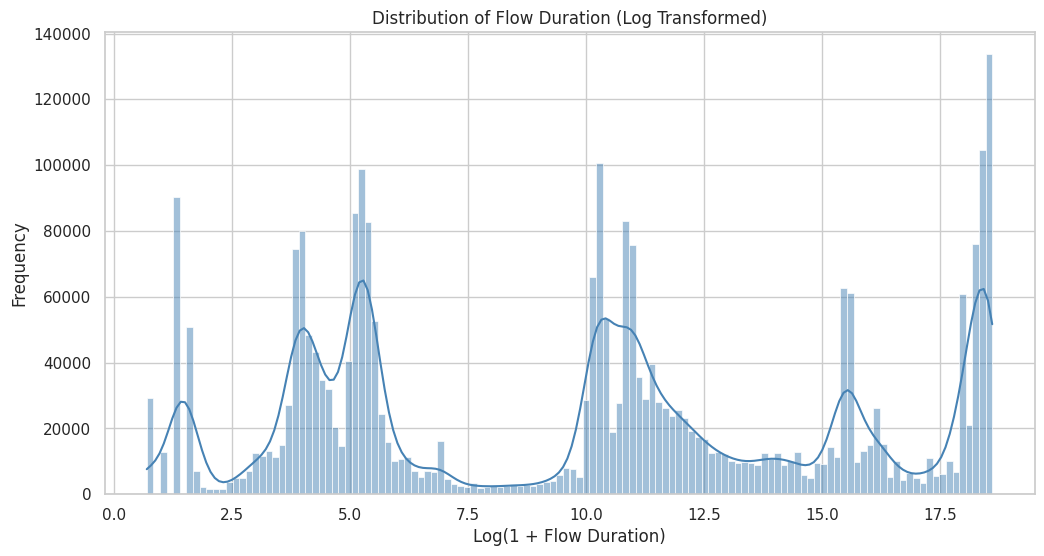


--- Statistical Summaries ---

[INFO] Numerical Features Summary:


,count,mean,std,min,25%,50%,75%,max
Destination Port,2827876.0,8.061534e+03,1.827432e+04,0.0,53.0,80.0,443.00,65535.0
Flow Duration,2827876.0,1.480065e+07,3.366750e+07,-13.0,155.0,31338.0,3239368.25,119999998.0
Total Fwd Packets,2827876.0,9.368972e+00,7.500527e+02,1.0,2.0,2.0,5.00,219759.0
Total Backward Packets,2827876.0,1.040396e+01,9.978937e+02,0.0,1.0,2.0,4.00,291922.0
Total Length of Fwd Packets,2827876.0,5.498522e+02,9.998639e+03,0.0,12.0,62.0,188.00,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2827876.0,5.835492e+04,5.773818e+05,0.0,0.0,0.0,0.00,110000000.0
Idle Mean,2827876.0,8.324468e+06,2.364057e+07,0.0,0.0,0.0,0.00,120000000.0
Idle Std,2827876.0,5.043548e+05,4.605289e+06,0.0,0.0,0.0,0.00,76900000.0
Idle Max,2827876.0,8.704568e+06,2.437766e+07,0.0,0.0,0.0,0.00,120000000.0



[INFO] Categorical Features Summary:

-> Counts for 'Label':
Label
BENIGN                       2271320
DoS Hulk                      230124
PortScan                      158804
DDoS                          128025
DoS GoldenEye                  10293
FTP-Patator                     7935
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1956
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                      36
Web Attack  Sql Injection         21
Heartbleed                        11
Name: count, dtype: int64


In [6]:
# check that the cleaned dataframe exists before proceeding
if 'df_clean' in locals():
    print("--- Starting Exploratory Data Analysis ---")

    # --- 1. Target Variable Analysis (Bar Plot) ---
    # A bar plot is better than a pie chart for imbalanced classes.
    plt.figure(figsize=(12, 8))
    # Using a log scale on the x-axis to visualize the massive imbalance
    plt.xscale('log')
    # Use a blue sequential palette. '_r' reverses it to have the darkest blue for the largest category.
    sns.countplot(y='Label', data=df_clean, order=df_clean['Label'].value_counts().index, palette='Blues_r')
    plt.title('Distribution of Traffic Types (Log Scale)')
    plt.xlabel('Count (Log Scale)')
    plt.ylabel('Traffic Type')
    plt.grid(axis='x') # Keep grid lines for the x-axis
    plt.show()


    # --- 2. Numerical Feature Analysis (Histogram) ---
    # Let's look at a key feature like 'Flow Duration'.
    # Network data is often highly skewed, so plotting on a log scale can reveal more detail.
    plt.figure(figsize=(12, 6))
    # Use np.log1p for a safe log transformation (handles zero values)
    sns.histplot(np.log1p(df_clean['Flow Duration']), kde=True, color="steelblue")
    plt.title('Distribution of Flow Duration (Log Transformed)')
    plt.xlabel('Log(1 + Flow Duration)')
    plt.ylabel('Frequency')
    plt.show()


    # --- 3. Statistical Summaries (Unchanged) ---
    # This part remains a best practice for getting a quantitative overview.
    print("\n--- Statistical Summaries ---")
    print("\n[INFO] Numerical Features Summary:")
    # Use .T to transpose the output for better readability with many columns
    display(df_clean.describe().T)

    print("\n[INFO] Categorical Features Summary:")
    # This loop correctly identifies and describes any text-based columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"\n-> Counts for '{col}':")
        print(df_clean[col].value_counts())

else:
    print("❌ DataFrame 'df_clean' not found. Please ensure previous cells were executed successfully.")

**1.6.2 Bivariate Analysis**

--- Bivariate Analysis: Best Visualizations ---


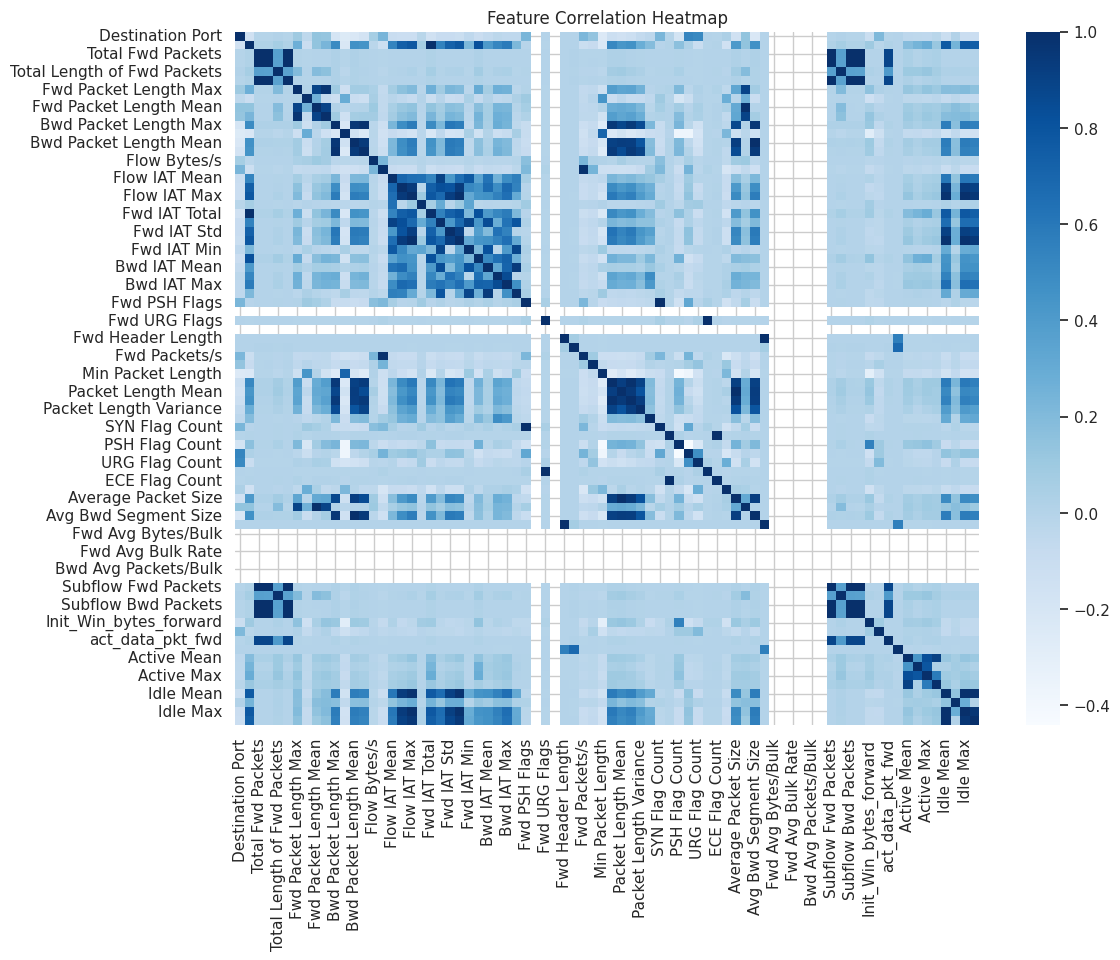

[INFO] For the violin plot, excluding 115 rows where Flow Duration is 0.


/tmp/ipython-input-3132235887.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y='Flow Duration', data=df_positive_duration,


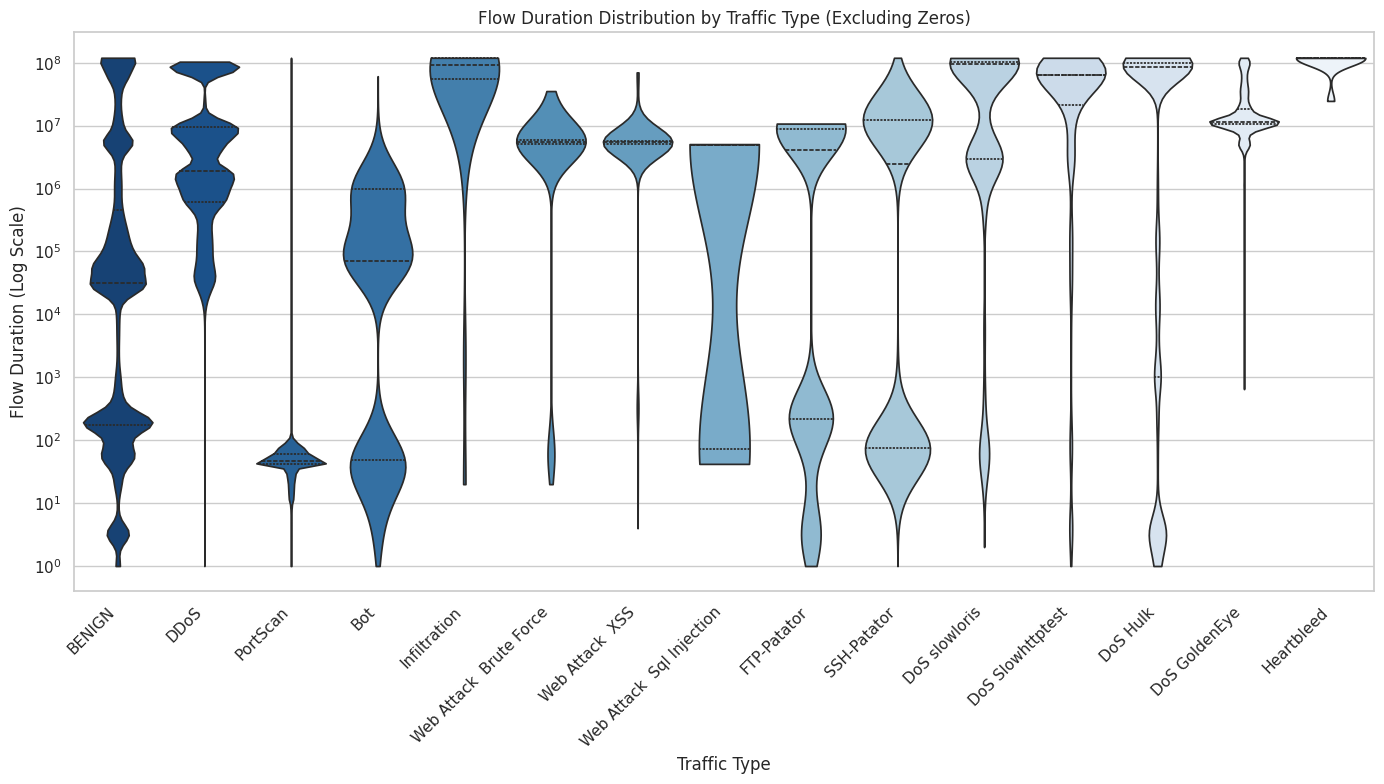


--- (Template) Categorical vs. Categorical Analysis ---


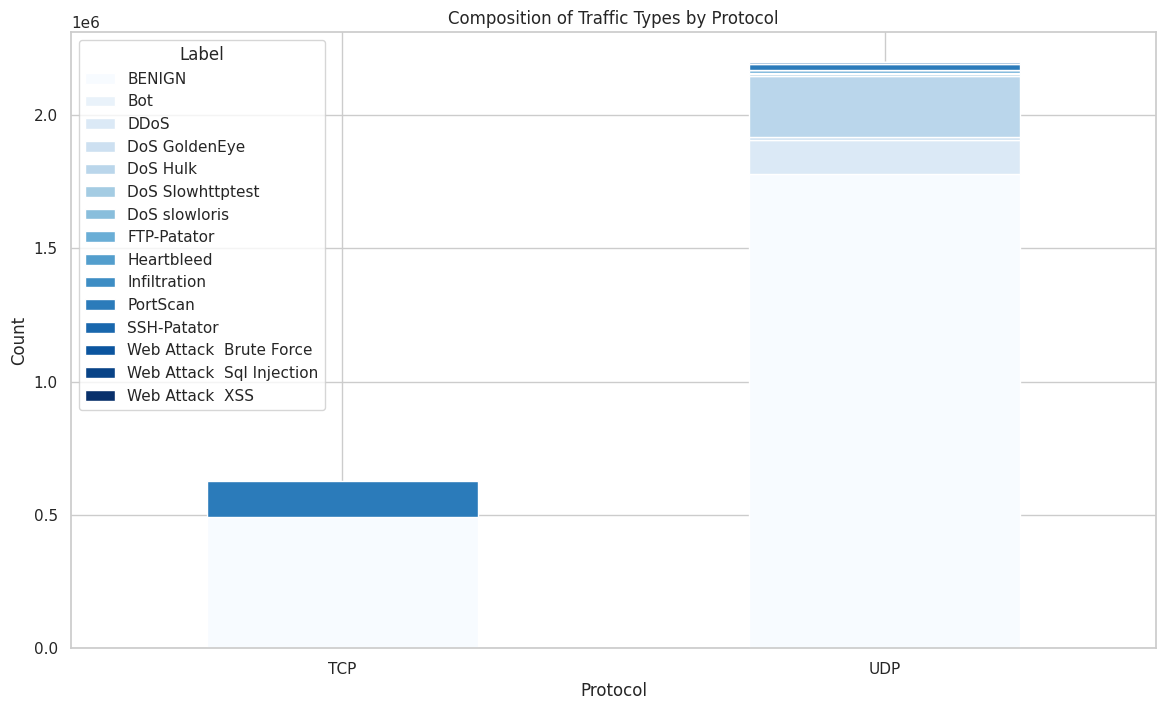

In [12]:
# check that the cleaned dataframe exists before proceeding
if 'df_clean' in locals():
    print("--- Bivariate Analysis: Best Visualizations ---")

    # --- 1. Numeric vs. Numeric: Correlation Heatmap ---
    plt.figure(figsize=(12, 9))
    numeric_df = df_clean.select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), cmap='Blues')
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # --- 2. Numeric vs. Categorical: Violin Plot (IMPROVED) ---
    # Create a new DataFrame excluding zero-duration flows for proper log scaling.
    df_positive_duration = df_clean[df_clean['Flow Duration'] > 0]

    # Calculate how many rows were excluded
    excluded_rows = len(df_clean) - len(df_positive_duration)
    print(f"[INFO] For the violin plot, excluding {excluded_rows} rows where Flow Duration is 0.")

    plt.figure(figsize=(14, 8))
    plt.yscale('log')
    sns.violinplot(x='Label', y='Flow Duration', data=df_positive_duration,
                   palette='Blues_r', inner='quartile', cut=0)
    plt.xticks(rotation=45, ha='right')
    plt.title('Flow Duration Distribution by Traffic Type (Excluding Zeros)')
    plt.xlabel('Traffic Type')
    plt.ylabel('Flow Duration (Log Scale)')
    plt.tight_layout()
    plt.show()

    # --- 3. Categorical vs. Categorical: Stacked Bar Chart ---
    print("\n--- (Template) Categorical vs. Categorical Analysis ---")
    if 'Protocol' not in df_clean.columns:
        df_clean['Protocol'] = df_clean['Destination Port'].apply(lambda port: 'TCP' if port > 1024 else 'UDP')

    contingency_table = pd.crosstab(df_clean['Protocol'], df_clean['Label'])

    contingency_table.plot(kind='bar', stacked=True, figsize=(14, 8),
                           colormap='Blues', title='Composition of Traffic Types by Protocol')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

else:
    print("❌ DataFrame 'df_clean' not found. Please ensure previous cells were executed successfully.")

**1.6.3 Multivariate Analysis**

--- Multivariate Analysis ---


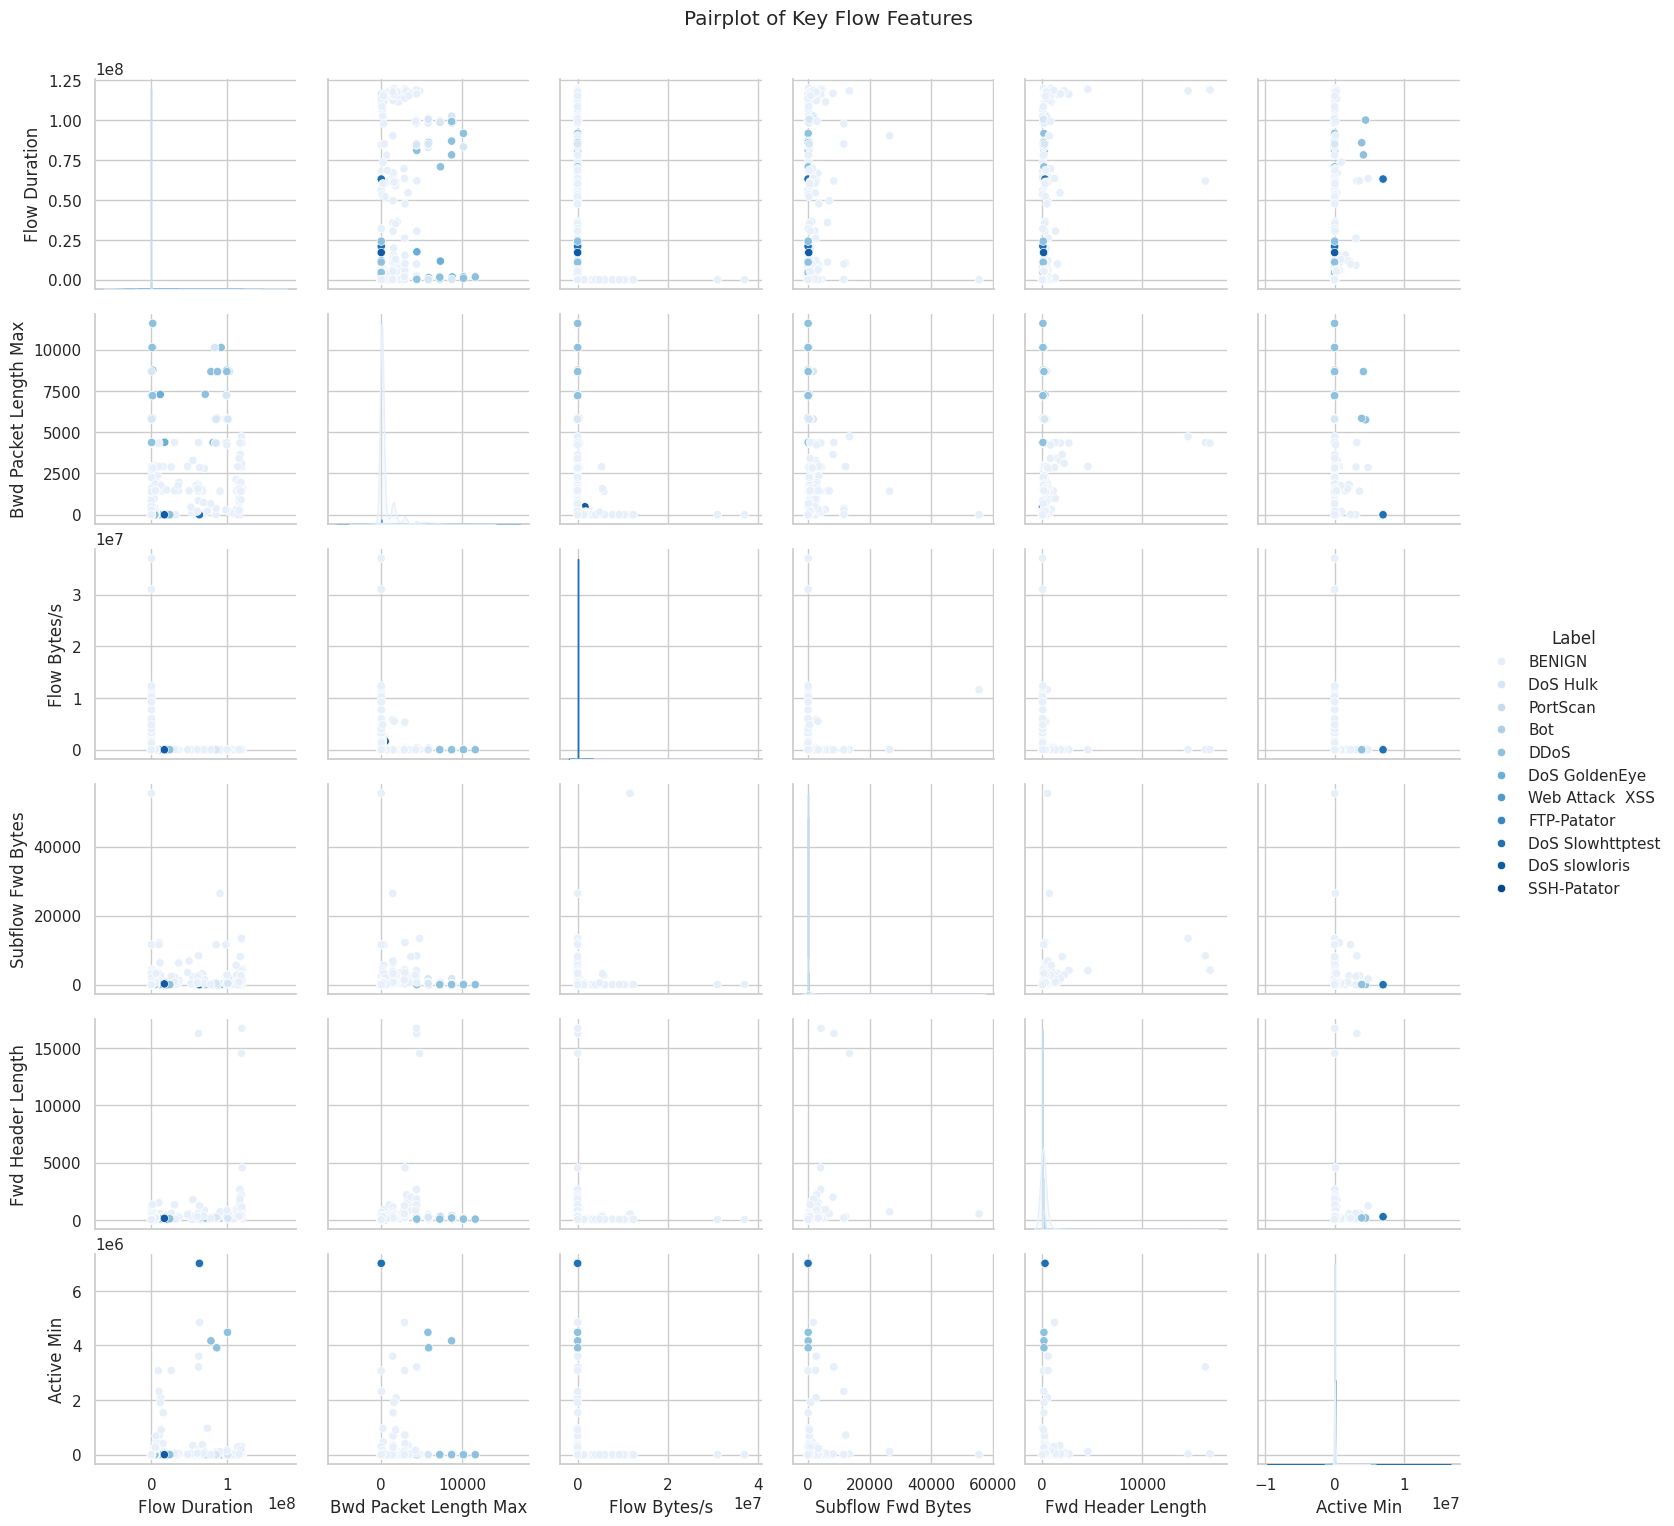

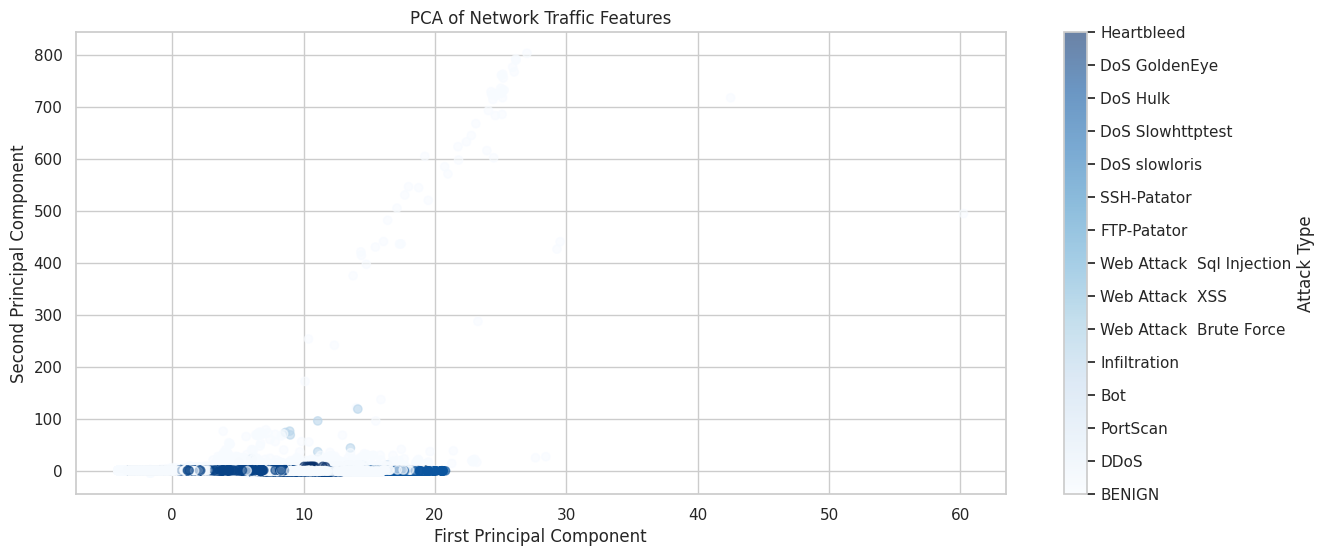

Explained variance ratio: [0.2162831  0.10260789]


In [13]:
# check that the cleaned dataframe exists before proceeding
if 'df_clean' in locals():
    print("--- Multivariate Analysis ---")

    # Define key features for the pairplot
    key_features = [
        'Flow Duration', 'Bwd Packet Length Max', 'Flow Bytes/s',
        'Subflow Fwd Bytes', 'Fwd Header Length', 'Active Min'
    ]
    # Filter for features that are actually in the DataFrame
    available_features = [feat for feat in key_features if feat in df_clean.columns]

    # --- 1. Pairplot of Key Features ---
    # Take a sample for performance reasons
    sample_df = df_clean.sample(n=1000, random_state=42)

    # Create a blue palette tailored to the unique labels present *in the sample*
    # This ensures the correct number of colors and avoids warnings.
    sample_labels = sample_df['Label'].unique()
    blue_palette_sample = sns.color_palette("Blues", n_colors=len(sample_labels))

    sns.pairplot(sample_df, hue='Label', vars=available_features, palette=blue_palette_sample)
    plt.suptitle('Pairplot of Key Flow Features', y=1.02)
    plt.show()

    # --- 2. PCA Visualization ---
    plt.figure(figsize=(15, 6))

    # Prepare data for PCA
    numeric_df = df_clean.select_dtypes(include=[np.number])
    X = numeric_df.values
    y = df_clean['Label']

    # Standardize features (crucial for PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Convert text labels to numbers for color mapping
    label_codes = pd.factorize(y)[0]

    # Plot PCA using the 'Blues' colormap
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_codes, cmap='Blues', alpha=0.6)

    # Create a colorbar with the correct labels
    cbar = plt.colorbar(label='Attack Type')
    unique_labels = y.unique()
    unique_codes = pd.factorize(unique_labels)[0]
    cbar.set_ticks(unique_codes)
    cbar.set_ticklabels(unique_labels)

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA of Network Traffic Features')
    plt.show()

    # Explained Variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

else:
    print("❌ DataFrame 'df_clean' not found. Please ensure previous cells were executed successfully.")

**2. Data Processing**

**2.1 Final Filtering, Feature Selection, and Data Splitting**

In [9]:
from sklearn.model_selection import train_test_split

if 'df_clean' in locals():
    print("--- Starting Final Data Preparation and Splitting ---")

    # define the specific web attack labels for the model's focus
    relevant_attacks = [
        'Web Attack Brute Force',
        'Web Attack XSS',
        'Web Attack Sql Injection'
    ]

    # create a list of all labels to keep
    labels_to_keep = ['BENIGN'] + relevant_attacks

    # filter the dataframe to only include these labels
    df_filtered = df_clean[df_clean['Label'].isin(labels_to_keep)].copy()

    # create a new binary 'Attack' column (0 for BENIGN, 1 for Attack)
    df_filtered['Attack'] = df_filtered['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

    # define the six critical features from your project proposal [cite: 12, 21]
    final_features = [
        'Flow Duration',
        'Bwd Packet Length Max',
        'Flow Bytes/s',
        'Subflow Fwd Bytes',
        'Fwd Header Length',
        'Active Min'
    ]

    # create the final feature matrix (X) and target vector (y)
    X = df_filtered[final_features]
    y = df_filtered['Attack']

    print(f"[INFO] Feature matrix X created with shape: {X.shape}")
    print(f"[INFO] Target vector y created with shape: {y.shape}")

    # split data into training (60%), validation (20%), and test (20%) sets
    # this creates the holdout set for final testing [cite: 39]
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    print("\n✅ Data preparation and 60-20-20 split complete.")
    print(f"Training set shape:   {X_train.shape}")
    print(f"Validation set shape: {X_valid.shape}")
    print(f"Test set shape:       {X_test.shape}")
else:
    print("❌ DataFrame 'df_clean' not found. Please run the initial cleaning cell first.")

--- Starting Final Data Preparation and Splitting ---
[INFO] Feature matrix X created with shape: (2271320, 6)
[INFO] Target vector y created with shape: (2271320,)

✅ Data preparation and 60-20-20 split complete.
Training set shape:   (1362792, 6)
Validation set shape: (454264, 6)
Test set shape:       (454264, 6)


**2.2 Handle Class Imbalance**

In [10]:
from imblearn.combine import SMOTETomek

print("--- Applying SMOTE-Tomek to the training data ---")
print(f"Original training set distribution:\n{y_train.value_counts()}")

# initialize SMOTE-Tomek
# n_jobs=-1 uses all available CPU cores to speed up the process
smote_tomek = SMOTETomek(random_state=42, n_jobs=-1)

print("\n[INFO] Resampling is in progress. This may take a few minutes...")

# fit and resample ONLY the training data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("\n✅ Resampling complete.")
print(f"New resampled training set shape: {X_train_resampled.shape}")
print(f"New resampled training set distribution:\n{y_train_resampled.value_counts()}")

--- Applying SMOTE-Tomek to the training data ---
Original training set distribution:
Attack
0    1362792
Name: count, dtype: int64

[INFO] Resampling is in progress. This may take a few minutes...


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

**2.3 Hyperparameter Tuning with a Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# build a pipeline to chain the scaler and the model
# this is a best practice for preventing data leakage during cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42))
])

# define the search space for hyperparameters
param_dist = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [5, 7, 9],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0]
}

# set up RandomizedSearchCV to find the best model using 5-fold cross-validation
# we optimize for F1-score, a key metric for this project [cite: 13]
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10, # number of parameter settings that are sampled
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("--- Starting Hyperparameter Tuning ---")
random_search.fit(X_train_resampled, y_train_resampled)

print("\n✅ Hyperparameter tuning complete.")
print(f"Best F1-score found: {random_search.best_score_:.4f}")
print(f"Best parameters found: {random_search.best_params_}")